In [0]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.optimize as opt 

In [333]:
data = pd.read_csv('https://raw.githubusercontent.com/khuhroproeza/Andrew-sML/master/MLex2LogisticRegression/ex2data2.txt', header=None, names=['Test1', 'Test2','Acceptance'])

datax = data.values
data.head()

,Test1,Test2,Acceptance
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [0]:
neg = data['Acceptance'] == 0
pos = data['Acceptance'] == 1

In [0]:
accepted1 = data[pos]['Test1']
accepted2 = data[pos]['Test2']
nccepted1 = data[neg]['Test1']
nccepted2 = data[neg]['Test2']

In [0]:
def drawPlot(data,axes=None):
  Label_X = 'Exam Score 1'
  Label_Y = 'Exam Score 2'
  label_1 = 'Accepted'
  label_2 = 'Not Accepted'
  
  axes = plt.gca()
  axes.scatter(accepted1, accepted2, marker='+', c = 'green',s=60, linewidth=2, label=label_1)
  axes.scatter(nccepted1, nccepted2, marker='x', c = 'red',s=30, linewidth=2, label=label_2)
  axes.set_xlabel(Label_X)
  axes.set_ylabel(Label_Y)
  axes.legend(frameon= True, fancybox = True);

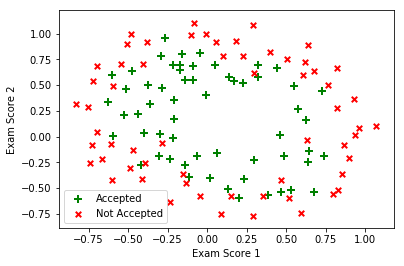

In [337]:
drawPlot(data)

Because of complication of the data there is no linear decision boundary possible. Thats why we need to create polynomial features.

In [0]:
x1 = data['Test1']
x2 = data['Test2']


In [0]:
dataX = pd.DataFrame()

In [0]:
dataX['Ones'] =np.ones(len(x1))

In [0]:
dataX.insert(0, 'Acceptance', data['Acceptance'])

In [0]:
degree = 5

for i in range(1, degree):
  for j in range(0,i):
    dataX['Feature-' + str(i) + str(j)] = np.power(x1, i-j)*np.power(x2, j)

In [343]:
dataX

,Acceptance,Ones,Feature-10,Feature-20,Feature-21,Feature-30,Feature-31,Feature-32,Feature-40,Feature-41,Feature-42,Feature-43
0,1,1.0,0.051267,0.002628,0.035864,1.347453e-04,0.001839,0.025089,6.907989e-06,9.426244e-05,0.001286,1.755144e-02
1,1,1.0,-0.092742,0.008601,-0.063523,-7.976812e-04,0.005891,-0.043509,7.397855e-05,-5.463638e-04,0.004035,-2.980122e-02
2,1,1.0,-0.213710,0.045672,-0.147941,-9.760555e-03,0.031616,-0.102412,2.085928e-03,-6.756745e-03,0.021886,-7.089469e-02
3,1,1.0,-0.375000,0.140625,-0.188321,-5.273438e-02,0.070620,-0.094573,1.977539e-02,-2.648268e-02,0.035465,-4.749364e-02
4,1,1.0,-0.513250,0.263426,-0.238990,-1.352032e-01,0.122661,-0.111283,6.939303e-02,-6.295600e-02,0.057116,-5.181790e-02
5,1,1.0,-0.524770,0.275384,-0.110097,-1.445130e-01,0.057775,-0.023098,7.583610e-02,-3.031883e-02,0.012121,-4.846023e-03
6,1,1.0,-0.398040,0.158436,-0.013675,-6.306380e-02,0.005443,-0.000470,2.510192e-02,-2.166683e-03,0.000187,-1.614256e-05
7,1,1.0,-0.305880,0.093563,0.058805,-2.861892e-02,-0.017987,-0.011305,8.753955e-03,5.501987e-03,0.003458,2.173452e-03
8,1,1.0,0.016705,0.000279,-0.006753,4.661648e-06,-0.000113,0.002730,7.787282e-08,-1.884424e-06,0.000046,-1.103480e-03
9,1,1.0,0.131910,0.017400,-0.067787,2.295267e-03,-0.008942,0.034835,3.027686e-04,-1.179515e-03,0.004595,-1.790145e-02


In [0]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Now we will change our cost function from previous part to accomdate the regularized function.

In [0]:
def CostFunction(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(X)) + reg

In [0]:
 def gradient(theta, X,y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    
    return grad

In [0]:
cols = dataX.shape[1]

In [0]:
X = dataX.iloc[:,1:cols]

In [0]:
y = dataX.iloc[:, 0:1]


In [0]:
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(11)

In [0]:
learningRate = 0.01

In [352]:
CostFunction(theta, X,y, learningRate)

0.6931471805599454

In [353]:
gradient(theta, X, y, learningRate)

array([0.00847458, 0.01878809, 0.05034464, 0.01150133, 0.01835599,
       0.00732393, 0.00819244, 0.03934862, 0.00223924, 0.01286005,
       0.00309594])

In [354]:
result = opt.fmin_tnc(func=CostFunction, x0=theta, fprime=gradient, args=(X, y, learningRate))
result

(array([ 0.01190141,  0.00938378, -0.03634539, -0.02261183,  0.01193149,
        -0.00410852, -0.01897198, -0.0270403 ,  0.00119307, -0.03110161,
        -0.00228883]), 92, 4)

In [0]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [356]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 80%


In [357]:
from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(X, y.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [358]:
model.score(X, y)

0.6610169491525424